### Preview: pulsations in PHOEBE -- coming soon to a computer near you

Pulsations in spherical stars can be described by a set of three wavenumbers: radial order $n$, non-radial degree $l$, and longitudinal order $m$. Radial order $n$ gives the number of nodes between the center and the surface of
the star; non-radial degree $l$ gives the number of all (longitudinal and latitudinal) node lines; and longitudinal order $m$ gives the number of longitudinal node lines (Aerts, Christensen-Dalsgaard, and Kurtz, 2010). Longitudinal order $m$ can assume values from $-l$ to $l$, where $\pm m$ modes correspond to mode chirality and are indistinguishable for spherically symmetric stars because there is no preferred axis, but different for non-symmetric (i.e. rotating, distorted) stars where axial asymmetry breaks the degeneracy. Thus, $l = 0$ modes are radial pulsations, $l = 1$ modes are dipole modes, $l = 2$ are quadrupole modes, etc.

*PHOEBE support for pulsations has not yet been released. Thus, this is just a preview of the functionality to come in the near future.*

As usual, let's import phoebe. Note that this is an *unreleased* and *unsupported* version from a development branch.

In [15]:
import phoebe

In [2]:
%matplotlib inline

To demonstrate pulsations, we will use a single star as it keeps things simple. Let's initialize a default star:

In [3]:
s = phoebe.default_star(starA='pulsator')

Pulsations in PHOEBE are *features*, similar to spots and gaussian processes covered in [Tutorial 6](Tutorial_06_features.ipynb). They are characterized by radial amplitude (`radamp`), frequency (`freq`), phase (`phase`) and pulsation modes `l` and `m`. For a start let's initialize a radial pulsator ($l=m=0$):

In [4]:
s.add_feature('pulsation', component='pulsator', feature='puls01', freq=10, phase=0.5, l=0, m=0)

<ParameterSet: 7 parameters | contexts: feature, compute>

Let's take a closer look at the pulsation ParameterSet:

In [5]:
print(s['puls01'])

ParameterSet: 7 parameters
            radamp@puls01@feature: 0.1
              freq@puls01@feature: 10.0 1 / d
             phase@puls01@feature: 0.5
                 l@puls01@feature: 0
                 m@puls01@feature: 0
           teffext@puls01@feature: False
         enabled@phoebe01@compute: True


One parameter that might have caught your eye is `teffext`; PHOEBE currently modifies the temperature map by following the gravity darkening law, i.e. the local temperature change is caused by the change in $\log g$ as driven by the radial amplitude `radamp`. This is not an accurate physical description of the surface brightness variability (see the talk by Rich Townsend that follows this) -- that is why PHOEBE *will* support external temperature mapping to be provided.

Now that we have a pulsation on our star, let's compute a mesh in, say, 20 points, and see how it changes:

In [6]:
s.add_dataset('mesh', times=phoebe.linspace(0, 0.1, 20), passband='Johnson:V', dataset='mesh01')

<ParameterSet: 85 parameters | contexts: constraint, compute, figure, dataset>

Recall from the [meshing tutorial](http://phoebe-project.org/workshops/2021june/Tutorial_05c_meshes.ipynb) that by default the mesh only contains surface element coordinates. That's why we need to add the columns that we are interested in. Let's remind ourselves what our options are:

In [7]:
print(s['columns@mesh01'].choices)

['volume', 'xs', 'ys', 'zs', 'vxs', 'vys', 'vzs', 'nxs', 'nys', 'nzs', 'us', 'vs', 'ws', 'vus', 'vvs', 'vws', 'nus', 'nvs', 'nws', 'areas', 'loggs', 'teffs', 'rprojs', 'mus', 'visibilities', 'visible_centroids', 'rs']


Let's add `teffs` for now:

In [8]:
s['columns@mesh01'] = ['teffs',]

Now we can compute this model and animate it:

In [9]:
s.run_compute(model='l0m0')

100%|██████████| 50/50 [00:00<00:00, 200.05it/s]


<ParameterSet: 252 parameters | qualifiers: uvw_normals, teffs, uvw_elements, xyz_normals, times, comments, xyz_elements>

In [ ]:
afig, mplfig = s['mesh01@l0m0'].plot(animate=True, save='l0m0.gif', save_kwargs={'writer': 'imagemagick'})

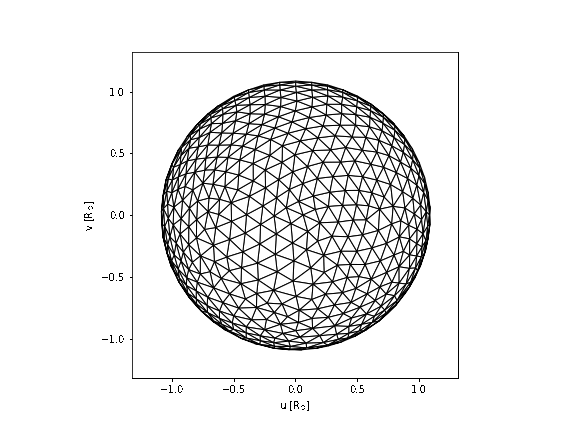

How about adding a light curve over 10 pulsational cycles? Let's add the dataset and recompute the model:

In [12]:
s.add_dataset('lc', times=phoebe.linspace(0, 1, 501), passband='Johnson:V', dataset='lc01')

<ParameterSet: 73 parameters | contexts: constraint, compute, figure, dataset>

In [13]:
s.run_compute(model='l0m0', overwrite=True)

100%|██████████| 549/549 [00:03<00:00, 137.39it/s]


<ParameterSet: 254 parameters | kinds: mesh, lc>

/usr/local/lib/python3.9/dist-packages/phoebe/dependencies/autofig/axes.py:1011: MatplotlibDeprecationWarning: 
The change_geometry function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use set_subplotspec instead.
  ax.change_geometry(rows, cols, i+1)
/usr/local/lib/python3.9/dist-packages/phoebe/dependencies/autofig/axes.py:1011: MatplotlibDeprecationWarning: 
The update_params function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  ax.change_geometry(rows, cols, i+1)
/usr/local/lib/python3.9/dist-packages/phoebe/dependencies/autofig/axes.py:1011: MatplotlibDeprecationWarning: 
The figbox attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use get_subplotspec().get_position(self.figure) instead.
  ax.change_geometry(rows, cols, i+1)


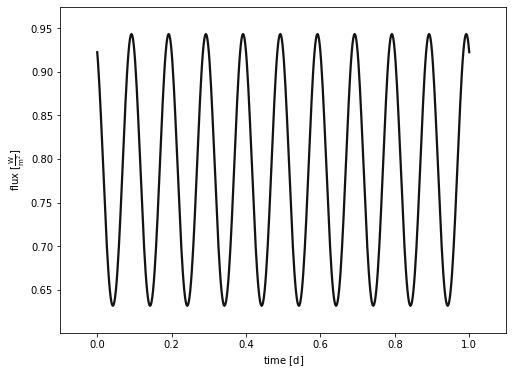

In [19]:
afig, mplfig = s['lc01'].plot(show=True)

Now let's try something more complicated. Let's change pulsation parameters to, say, $l=5$, $m=-2$, and color-code by temperature:

In [20]:
s['l@puls01'] = 5
s['m@puls01'] = -2

In [21]:
s.run_compute(model='l5mn2')

100%|██████████| 549/549 [00:08<00:00, 66.48it/s]


<ParameterSet: 254 parameters | kinds: mesh, lc>

/usr/local/lib/python3.9/dist-packages/phoebe/dependencies/autofig/axes.py:1011: MatplotlibDeprecationWarning: 
The change_geometry function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use set_subplotspec instead.
  ax.change_geometry(rows, cols, i+1)
/usr/local/lib/python3.9/dist-packages/phoebe/dependencies/autofig/axes.py:1011: MatplotlibDeprecationWarning: 
The update_params function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  ax.change_geometry(rows, cols, i+1)
/usr/local/lib/python3.9/dist-packages/phoebe/dependencies/autofig/axes.py:1011: MatplotlibDeprecationWarning: 
The figbox attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use get_subplotspec().get_position(self.figure) instead.
  ax.change_geometry(rows, cols, i+1)


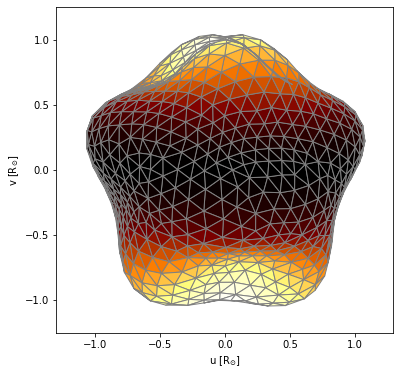

In [22]:
afig, mplfig = s['mesh01@l5mn2'].plot(animate=True, fc='teffs', ec='gray', save='l5mn2.gif', save_kwargs={'writer': 'imagemagick'})

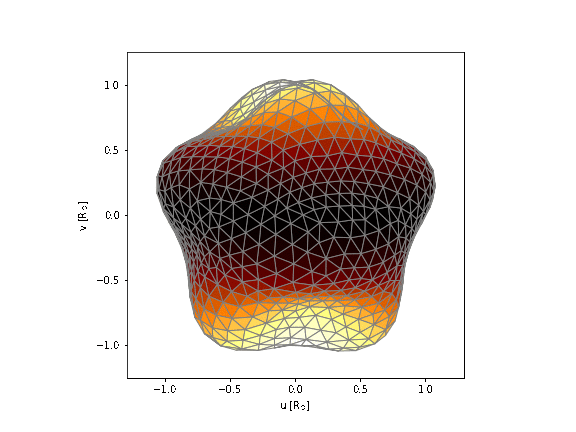

Notice gravity darkening due to rotation of the star?

As one last demonstration, let's tilt the star by, say, 15 degrees and let's color-code it by intensities. For that to happen, we need to add intensity to the `columns` array:

In [23]:
s['columns@mesh01'] += ['intensities@lc01']

In [24]:
s['incl@pulsator'] = 75

In [25]:
s.run_compute(model='final')

100%|██████████| 549/549 [00:08<00:00, 67.18it/s]


<ParameterSet: 304 parameters | kinds: mesh, lc>

Finally, let's animate the mesh:

/usr/local/lib/python3.9/dist-packages/phoebe/dependencies/autofig/axes.py:1011: MatplotlibDeprecationWarning: 
The change_geometry function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use set_subplotspec instead.
  ax.change_geometry(rows, cols, i+1)
/usr/local/lib/python3.9/dist-packages/phoebe/dependencies/autofig/axes.py:1011: MatplotlibDeprecationWarning: 
The update_params function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  ax.change_geometry(rows, cols, i+1)
/usr/local/lib/python3.9/dist-packages/phoebe/dependencies/autofig/axes.py:1011: MatplotlibDeprecationWarning: 
The figbox attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use get_subplotspec().get_position(self.figure) instead.
  ax.change_geometry(rows, cols, i+1)


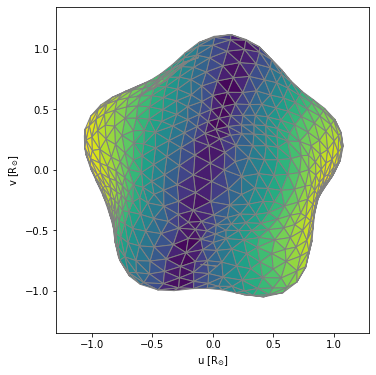

In [27]:
afig, mplfig = s['mesh01@final'].plot(animate=True, show=True, save='puls_final.gif', fc='intensities@lc01', ec='gray', save_kwargs={'writer': 'imagemagick'})

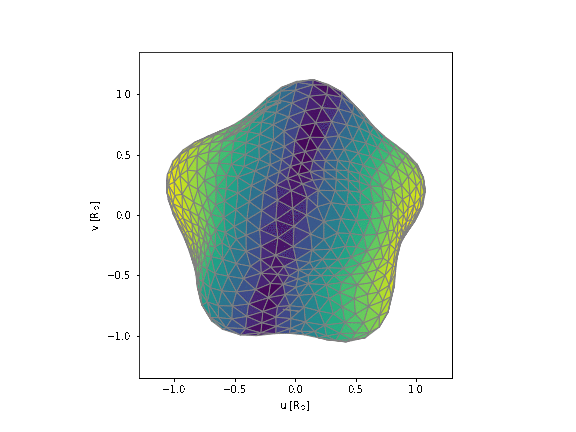